In [1]:
import numpy as np
# from projectile import simulator_multioutput, print_results
import mogp_emulator
import pandas as pd
from scipy.io import savemat, loadmat
try:
    import matplotlib.pyplot as plt
    makeplots = True
except ImportError:
    makeplots = False
import pickle
def lin2db(x):
    return 10*np.log10(x)
def db2lin(x):
    return 10**(x/10) 
launch_powers = loadmat("data/input_data_mW.mat")['lnch_pow_mW']
noise_powers = loadmat("data/output_data_mW.mat")['tot_noise_pow_mW']

In [2]:
num_channels = launch_powers.shape[1]
num_examples = launch_powers.shape[0]
num_train = 150
num_test = 100

In [3]:
launch_powers.shape

(250, 5)

In [4]:
noise_powers.shape

(250, 5)

Create data array

In [5]:
noise_powers_shaped = np.zeros([num_channels,num_examples])
for i in range(num_channels):
    noise_powers_shaped[i] = noise_powers[:,i]

In [6]:
noise_powers_shaped.shape

(5, 250)

In [7]:
noise_powers_shaped[:,:150].shape

(5, 150)

In [8]:
noise_powers_shaped[:,150:].shape

(5, 100)

In [9]:
np.sum(noise_powers_shaped[0] - noise_powers[:,0])

0.0

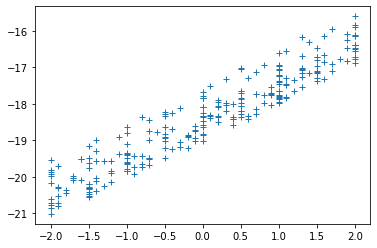

In [10]:
plt.plot(lin2db(launch_powers)[:,0], lin2db(noise_powers[:,0]), '+')
# plt.plot(lin2db(launch_powers)[:,1], lin2db(noise_powers[:,1]), 'x')
# plt.plot(lin2db(launch_powers)[:,2], lin2db(noise_powers[:,2]), '*')
# plt.plot(lin2db(launch_powers)[:,3], lin2db(noise_powers[:,3]), '.')
# plt.plot(lin2db(launch_powers)[:,4], lin2db(noise_powers[:,4]), '>')
plt.show()

In [86]:
min(lin2db(noise_powers[:,0]))

-21.01635471331459

In [11]:
x_train = launch_powers[:num_train]
y_train = noise_powers_shaped[:,:num_train]
x_test = launch_powers[num_train:]
y_test = noise_powers_shaped[:,num_train:]

In [63]:
np.min(x_train)

0.6309573444801932

In [12]:
# gp = pickle.load(open("results/gp_150.pkl", 'rb'))
# kernel = 'SquaredExponential'
kernel = 'Matern52'
nugget = 'fit'
# nugget = 'adaptive'
gp = pickle.load(open("results/gp_150_"+kernel+"_"+nugget+".pkl", 'rb'))
predictions = pickle.load(open("results/predictions_100_"+kernel+"_"+nugget+".pkl", 'rb'))

NOTE! Channel indices may have been reversed here by the reshaping - need to double check with Nikita which channel is which...

In [13]:
print("MAE ch1 = ",np.mean(abs(lin2db(predictions.mean[0]) - lin2db(y_test[0]))))
print("MAE ch2 = ",np.mean(abs(lin2db(predictions.mean[1]) - lin2db(y_test[1]))))
print("MAE ch3 = ",np.mean(abs(lin2db(predictions.mean[2]) - lin2db(y_test[2]))))
print("MAE ch4 = ",np.mean(abs(lin2db(predictions.mean[3]) - lin2db(y_test[3]))))
print("MAE ch5 = ",np.mean(abs(lin2db(predictions.mean[4]) - lin2db(y_test[4]))))

MAE ch1 =  0.022418392465662632
MAE ch2 =  0.020367913524786622
MAE ch3 =  0.024504521364748264
MAE ch4 =  0.025811527805026113
MAE ch5 =  0.02499179097171993


In [14]:
print("RMSE ch1 = ",(np.mean(   (lin2db(predictions.mean[0]) - lin2db(y_test[0]))**2   ))**0.5)
print("RMSE ch2 = ",(np.mean(   (lin2db(predictions.mean[1]) - lin2db(y_test[1]))**2   ))**0.5)
print("RMSE ch3 = ",(np.mean(   (lin2db(predictions.mean[2]) - lin2db(y_test[2]))**2   ))**0.5)
print("RMSE ch4 = ",(np.mean(   (lin2db(predictions.mean[3]) - lin2db(y_test[3]))**2   ))**0.5)
print("RMSE ch5 = ",(np.mean(   (lin2db(predictions.mean[4]) - lin2db(y_test[4]))**2   ))**0.5)

RMSE ch1 =  0.028068316602398547
RMSE ch2 =  0.026961699808943456
RMSE ch3 =  0.030037944907729118
RMSE ch4 =  0.03248253372495548
RMSE ch5 =  0.030856760311535253


In [15]:
print("MSE ch1 = ",np.mean(   (lin2db(predictions.mean[0]) - lin2db(y_test[0]))**2   ))
print("MSE ch2 = ",np.mean(   (lin2db(predictions.mean[1]) - lin2db(y_test[1]))**2   ))
print("MSE ch3 = ",np.mean(   (lin2db(predictions.mean[2]) - lin2db(y_test[2]))**2   ))
print("MSE ch4 = ",np.mean(   (lin2db(predictions.mean[3]) - lin2db(y_test[3]))**2   ))
print("MSE ch5 = ",np.mean(   (lin2db(predictions.mean[4]) - lin2db(y_test[4]))**2   ))

MSE ch1 =  0.0007878303968924819
MSE ch2 =  0.0007269332565875816
MSE ch3 =  0.0009022781342797697
MSE ch4 =  0.0010551149971928702
MSE ch5 =  0.0009521396569235371


In [16]:
print("Mean of pred. std",  np.mean(predictions.unc[0]**0.5))
print("Median of pred. std",  np.median(predictions.unc[0]**0.5))

Mean of pred. std 0.00014389979740856145
Median of pred. std 0.00013949150860783217


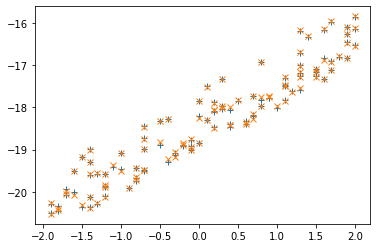

In [73]:
channel_idx = 0
plt.plot(lin2db(x_test[:,channel_idx]), lin2db(predictions.mean[channel_idx]), '+', label='GP Pred. mean')
plt.plot(lin2db(x_test[:,channel_idx]), lin2db(y_test[channel_idx]), 'x', label='Simulations')
plt.show()

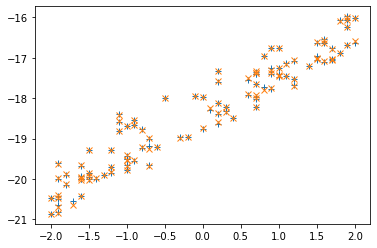

In [75]:
channel_idx = 1
plt.plot(lin2db(x_test[:,channel_idx]), lin2db(predictions.mean[channel_idx]), '+', label='GP Pred. mean')
plt.plot(lin2db(x_test[:,channel_idx]), lin2db(y_test[channel_idx]), 'x', label='Simulations')
# plt.savefig('figures/channel_1_test_set.jpeg', dpi=300,bbox_inches='tight')
plt.show()

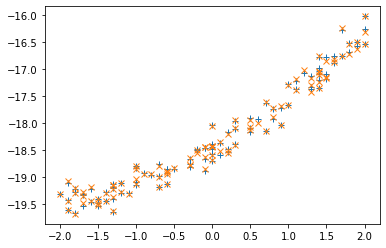

In [19]:
channel_idx = 2
plt.plot(lin2db(x_test[:,channel_idx]), lin2db(predictions.mean[channel_idx]), '+', label='GP Pred. mean')
plt.plot(lin2db(x_test[:,channel_idx]), lin2db(y_test[channel_idx]), 'x', label='Simulations')
plt.show()

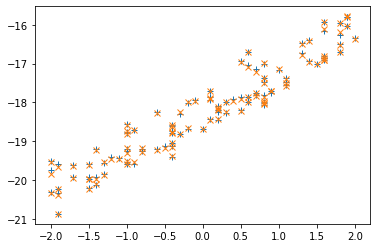

In [20]:
channel_idx = 3
plt.plot(lin2db(x_test[:,channel_idx]), lin2db(predictions.mean[channel_idx]), '+', label='GP Pred. mean')
plt.plot(lin2db(x_test[:,channel_idx]), lin2db(y_test[channel_idx]), 'x', label='Simulations')
plt.show()

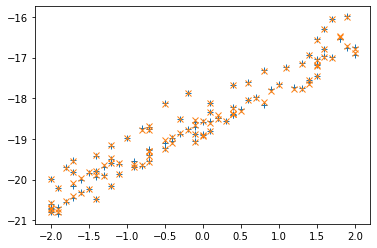

In [21]:
channel_idx = 4
plt.plot(lin2db(x_test[:,channel_idx]), lin2db(predictions.mean[channel_idx]), '+', label='GP Pred. mean')
plt.plot(lin2db(x_test[:,channel_idx]), lin2db(y_test[channel_idx]), 'x', label='Simulations')
plt.show()

Plot GP sweep with confidence bands

In [78]:
arr = np.zeros([100,5])
# x_pred = np.linspace(db2lin(-2.0), db2lin(2.0), 100)
x_pred = np.linspace(0, db2lin(2.0), 100)
arr[:,0] = x_pred
arr[:,1] = x_pred
arr[:,2] = x_pred
arr[:,3] = x_pred
arr[:,4] = x_pred

In [79]:
def convert_to_db_gpe_plots(sweep, sweep_unc, num_std):
    sweep_confp = sweep + num_std*(sweep_unc**0.5)
    sweep_confn = sweep - num_std*(sweep_unc**0.5)
    sweep_confn = np.array([lin2db(i) for i in sweep_confn])  # convert to dB
    sweep_confp = np.array([lin2db(i) for i in sweep_confp])
    sweep = np.array([lin2db(i) for i in sweep]) 
    return sweep, sweep_confn, sweep_confp

In [80]:
gp_preds = gp.predict(arr)

In [81]:
num_std = 2
ch1_sweep, ch1_sweep_confn, ch1_sweep_confp = convert_to_db_gpe_plots(gp_preds.mean[0], gp_preds.unc[0], 2)
ch2_sweep, ch2_sweep_confn, ch2_sweep_confp = convert_to_db_gpe_plots(gp_preds.mean[1], gp_preds.unc[1], 2)
ch3_sweep, ch3_sweep_confn, ch3_sweep_confp = convert_to_db_gpe_plots(gp_preds.mean[2], gp_preds.unc[2], 2)
ch4_sweep, ch4_sweep_confn, ch4_sweep_confp = convert_to_db_gpe_plots(gp_preds.mean[3], gp_preds.unc[3], 2)
ch5_sweep, ch5_sweep_confn, ch5_sweep_confp = convert_to_db_gpe_plots(gp_preds.mean[4], gp_preds.unc[4], 2)

/var/folders/yy/jh80d4jd7mq917bdprz9ftlw0000gn/T/ipykernel_23801/920228572.py:13: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(x)


/var/folders/yy/jh80d4jd7mq917bdprz9ftlw0000gn/T/ipykernel_23801/920228572.py:13: RuntimeWarning: divide by zero encountered in log10
  return 10*np.log10(x)


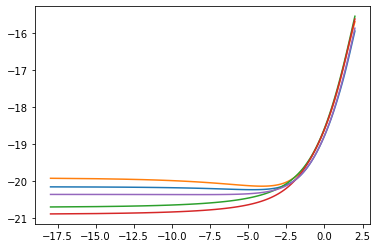

In [84]:
x_pred_dbm = lin2db(x_pred)
plt.plot(x_pred_dbm, lin2db(gp_preds.mean[0]))
plt.plot(x_pred_dbm, lin2db(gp_preds.mean[1]))
plt.plot(x_pred_dbm, lin2db(gp_preds.mean[2]))
plt.plot(x_pred_dbm, lin2db(gp_preds.mean[3]))
plt.plot(x_pred_dbm, lin2db(gp_preds.mean[4]))
plt.show()

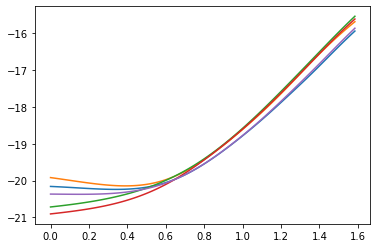

In [85]:
# x_pred_dbm = lin2db(x_pred)
x_pred_dbm = x_pred_dbm
plt.plot(x_pred, lin2db(gp_preds.mean[0]))
plt.plot(x_pred, lin2db(gp_preds.mean[1]))
plt.plot(x_pred, lin2db(gp_preds.mean[2]))
plt.plot(x_pred, lin2db(gp_preds.mean[3]))
plt.plot(x_pred, lin2db(gp_preds.mean[4]))
plt.savefig('figures/gp_extrapolation_to_zero.jpeg', dpi=300,bbox_inches='tight')
plt.show()

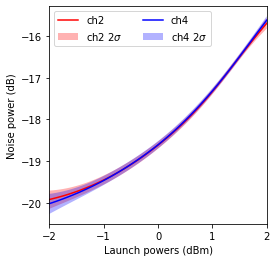

In [27]:
f, ax = plt.subplots()
# plt.plot(x_pred_dbm, ch1_sweep, 'b-', label='ch1')
# ax.fill(np.concatenate([x_pred_dbm, x_pred_dbm[::-1]]),
#             np.concatenate([ch1_sweep_confp,
#                             (ch1_sweep_confn)[::-1]]),
#             alpha=0.3, fc='b', ec='None', label='ch1 1$\sigma$')

plt.plot(x_pred_dbm, ch2_sweep, 'r-', label='ch2')
ax.fill(np.concatenate([x_pred_dbm, x_pred_dbm[::-1]]),
            np.concatenate([ch2_sweep_confp,
                            (ch2_sweep_confn)[::-1]]),
            alpha=0.3, fc='r', ec='None', label='ch2 2$\sigma$')

# plt.plot(x_pred_dbm, ch3_sweep,'r-', label='ch3')
# ax.fill(np.concatenate([x_pred_dbm, x_pred_dbm[::-1]]),
#             np.concatenate([ch3_sweep_confp,
#                             (ch3_sweep_confn)[::-1]]),
#             alpha=0.3, fc='r', ec='None', label='ch3 1$\sigma$')


plt.plot(x_pred_dbm, ch4_sweep, 'b-', label='ch4')
ax.fill(np.concatenate([x_pred_dbm, x_pred_dbm[::-1]]),
            np.concatenate([ch4_sweep_confp,
                            (ch4_sweep_confn)[::-1]]),
            alpha=0.3, fc='b', ec='None', label='ch4 2$\sigma$')

# plt.plot(x_pred_dbm, ch5_sweep, 'g-', label='ch5')
# ax.fill(np.concatenate([x_pred_dbm, x_pred_dbm[::-1]]),
#             np.concatenate([ch5_sweep_confp,
#                             (ch5_sweep_confn)[::-1]]),
#             alpha=0.3, fc='g', ec='None', label='ch5 1$\sigma$')
plt.xlabel("Launch powers (dBm)")
plt.ylabel("Noise power (dB)")
plt.xlim([x_pred_dbm[0], x_pred_dbm[-1]])
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.legend(ncol=2)
plt.savefig('figures/channel2vschannel4.jpeg', dpi=300,bbox_inches='tight')
plt.show()

Obtain bias from fitted GP:

In [30]:
biases = gp.predict(bias_input)

In [38]:
biases_mean = biases.mean

In [55]:
biases_mean_confp = biases_mean + (biases.unc)**0.5
biases_mean_confn = biases_mean - (biases.unc)**0.5

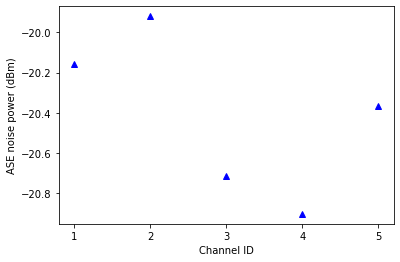

In [58]:
f, ax = plt.subplots()
plt.plot(lin2db(biases_mean), 'b^')
# plt.plot(lin2db(biases_mean_confp), 'b+')
# plt.plot(lin2db(biases_mean_confn), 'b_')
ax.set_xticks(np.arange(0,5,1))
ax.set_xticklabels(np.arange(1,6,1))
plt.xlabel("Channel ID")
plt.ylabel("ASE noise power (dBm)")
plt.savefig('figures/gp_bias_estimates.jpeg', dpi=300,bbox_inches='tight')
plt.show()

In [71]:
lin2db(np.mean(biases_mean))

-20.39796616608768